In [1]:
import pandas as pd 
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

Operation and PlaceHolder nodes


In [2]:
##
class Variable: 
    def __init__(self,X):
        self.input = X
        self.output = 1
        self.derivative = 1
        self.neig = []
class Add:
    def __init__(self,X,Y):
        self.X = X
        self.Y = Y
        self.input = str(X.input) + "+" + str(Y.input)
        self.output = 0
        self.neig = []
        self.derivative = 0
    def session(self):
        self.output = self.X.output + self.Y.output
    def Back(self):
        self.X.derivative = (((self.X.output+1) + self.Y.output) - self.output)/1
        self.Y.derivative = ((self.X.output + (self.Y.output+1)) - self.output)/1
class Multi:
    def __init__(self,X,Y):
        self.X = X
        self.Y = Y
        self.input = str(X.input) + "*" + str(Y.input)
        self.output = 0
        self.neig = []
        self.derivative = 0
    def session(self):
        self.output = self.X.output * self.Y.output
    def Back(self):
        self.X.derivative = (((self.X.output+1) * self.Y.output) - self.output)/1
        self.Y.derivative = ((self.X.output * (self.Y.output+1)) - self.output)/1
class Sub:
    def __init__(self,X,Y):
        self.X = X
        self.Y = Y
        self.input = str(X.input) + "-" + str(Y.input)
        self.output = 0
        self.neig = []
        self.derivative = 0
    def session(self):
        self.output = self.X.output - self.Y.output
    def Back(self):
        self.X.derivative = (((self.X.output+1) - self.Y.output) - self.output)/1
        self.Y.derivative = ((self.X.output - (self.Y.output+1)) - self.output)/1
class Divide:
    def __init__(self,X,Y):
        self.X = X
        self.Y = Y
        self.input = str(X.input) + "/" + str(Y.input)
        self.output = 0
        self.neig = []
        self.derivative = 0
    def session(self):
        self.output = self.X.output / self.Y.output
    def Back(self):
        self.X.derivative = (((self.X.output+1) / self.Y.output) - self.output)/1
        self.Y.derivative = ((self.X.output / (self.Y.output+1)) - self.output)/1
        

In [3]:
class Graph:
    def __init__(self):
        self.graph = []
        self.function = []
    def Constants(self,X):
        return Variable(X)
    def calculation(self,X,Y,Z):
        self.X = X
        self.Y = Y
        self.Z = None
        if Z == "*":
            self.Z = Multi(self.X,self.Y)
        elif Z == "+":
            self.Z = Add(self.X,self.Y)
        elif Z == "-":
            self.Z = Sub(self.X,self.Y)
        elif Z == "/":
            self.Z = Divide(self.X,self.Y)
        self.X.neig.append(self.Z)
        self.Y.neig.append(self.Z)
        self.Z.neig.append(self.X)
        self.Z.neig.append(self.Y)
        self.graph.append(self.X)
        self.graph.append(self.Y)
        self.graph.append(self.Z)
        return self.Z
    def draw(self, color = 'lightblue'):
        """
            Usage of networkx for visualisation
        """
        self.graph.append(Variable(self.graph[-1].output))
        self.graph[-2].neig.append(self.graph[-1])
        self.graph[-1].neig.append(self.graph[-2])
        self.function = [[i,i.neig[-1],i.output] for i in self.graph[:-1]]
        self.drawM = [[i.input,i.neig[-1].input,i.output] for i in self.graph[:-1]]
        self.G = nx.DiGraph()
        self.G.add_weighted_edges_from(self.drawM)
        plt.figure(figsize=(10,5))
       
        pos = nx.spring_layout(self.G)  # positions for all nodes
        nx.draw(self.G, pos, node_size=900, node_color=color, font_size=10, with_labels=True)
        nx.draw_networkx_edge_labels(self.G, pos, font_size=10,  edge_labels = nx.get_edge_attributes(self.G,'weight'))

In [4]:
def draw(drawG, color = 'lightblue'):
        """
            Usage of networkx for visualisation
        """
        G = nx.DiGraph()
        G.add_weighted_edges_from(drawG)
        plt.figure(figsize=(10,5))
       
        pos = nx.spring_layout(G)  # positions for all nodes
        nx.draw(G, pos, node_size=900, node_color=color, font_size=10, with_labels=True)
        nx.draw_networkx_edge_labels(G, pos, font_size=10,  edge_labels = nx.get_edge_attributes(G,'weight'))

In [5]:
def Forward_Prop(Topologic):
    for i in Topologic[:-1]:
        string = type(i).__name__
        if string == 'Variable':
            i.output = i.input
        else:
            i.session()
            print(i.output)
    Topologic[-1].input = Topologic[-2].output
            
def Backward_Prop(Topologic):
    for i in Topologic[1:]:
        string = type(i).__name__
        if not (string == 'Variable'):
            i.Back()

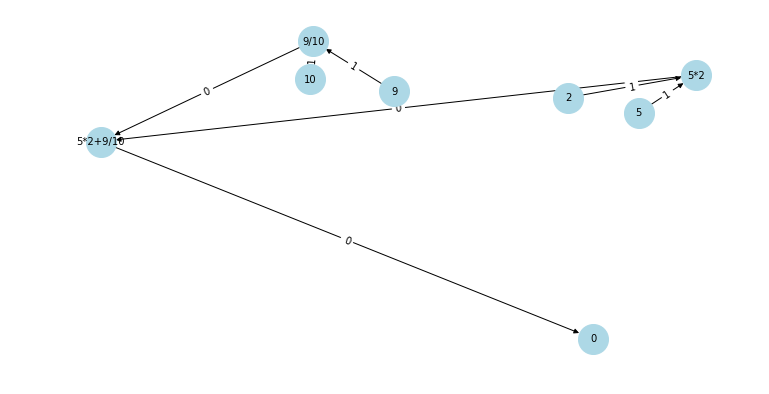

In [6]:
frame = Graph()
g = frame.calculation(frame.Constants(5),frame.Constants(2),'*')
z = frame.calculation(frame.Constants(9),frame.Constants(10),"/")
frame.calculation(g,z,"+")
frame.draw()
F = nx.DiGraph()
F.add_weighted_edges_from(frame.function)
T = nx.topological_sort(F)
T = list(T)

0.9
10
10.9


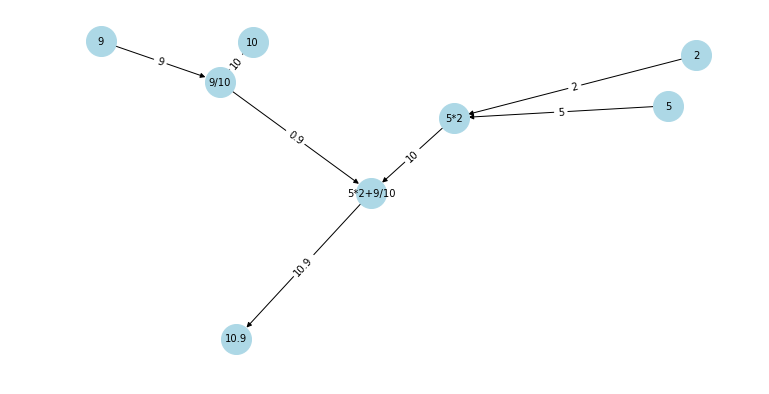

In [7]:
Forward_Prop(T)
draw([[i.input,i.neig[-1].input,i.output] for i in T[:-1]])

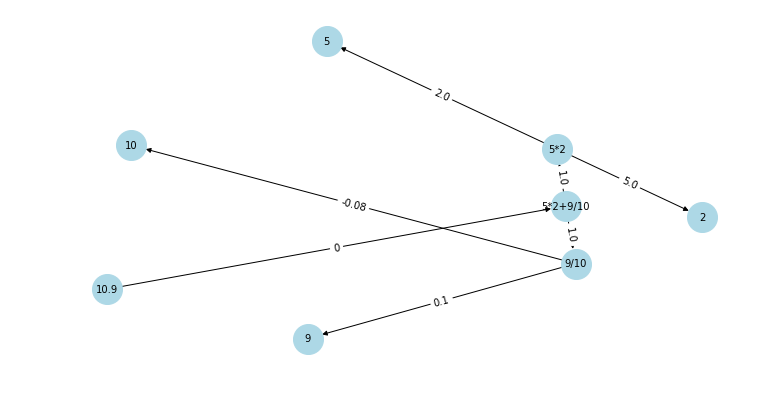

In [8]:
RT = list(reversed(T))
Backward_Prop(RT)
draw([[i.neig[-1].input,i.input,round(i.derivative,2)] for i in RT[1:]])        

In [26]:
RT

17
2.125
10.625


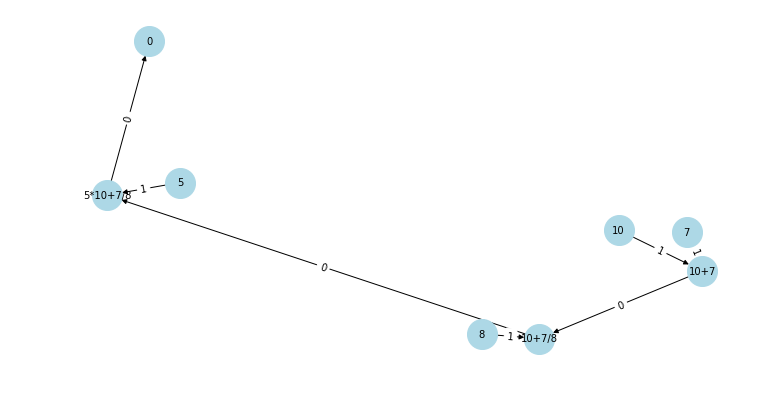

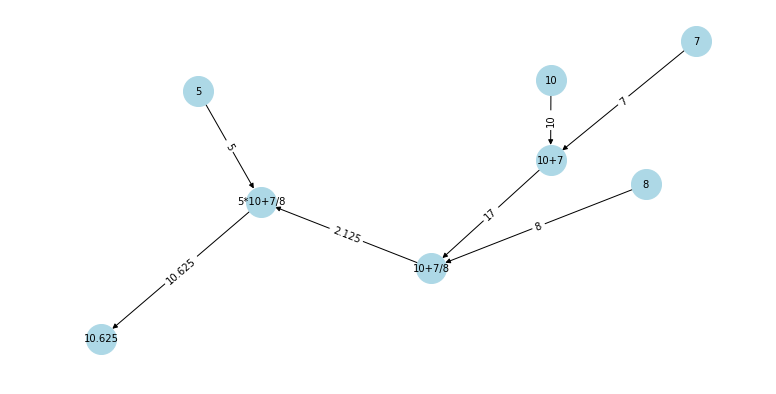

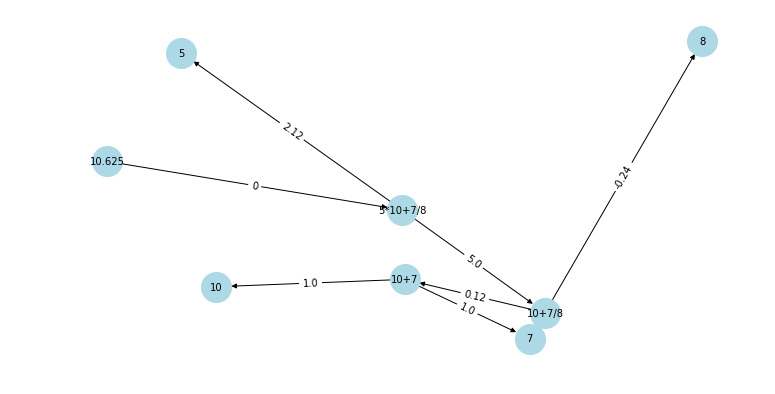

In [27]:
frame1 = Graph()
g1 = frame1.calculation(frame1.Constants(10),frame1.Constants(7),'+')
z1 = frame1.calculation(g1,frame1.Constants(8),"/")
frame1.calculation(frame1.Constants(5),z1,"*")
frame1.draw()
F1 = nx.DiGraph()
F1.add_weighted_edges_from(frame1.function)
T1 = nx.topological_sort(F1)
T1 = list(T1)
Forward_Prop(T1)
draw([[i.input,i.neig[-1].input,i.output] for i in T1[:-1]])
RT1 = list(reversed(T1))
Backward_Prop(RT1)
draw([[i.neig[-1].input,i.input,round(i.derivative,2)] for i in RT1[1:]]) 

16
5.333333333333333
10.333333333333332


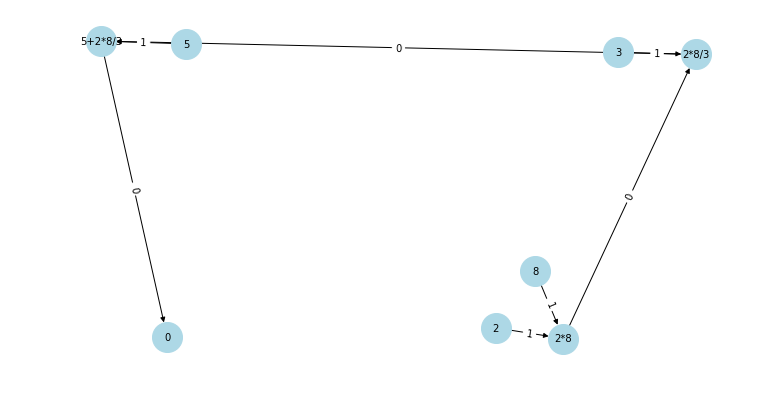

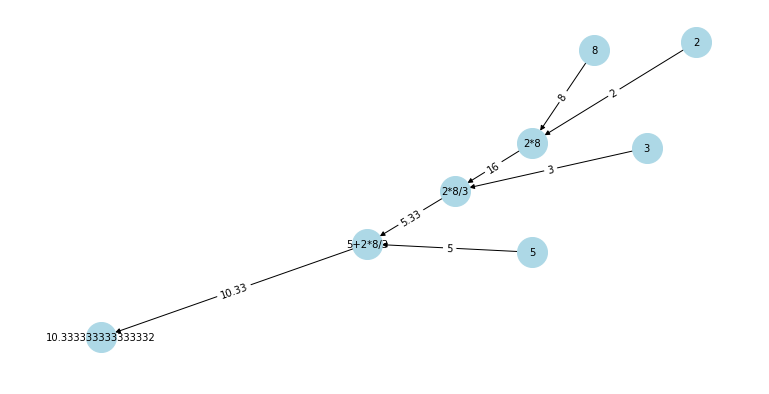

In [22]:
frame2 = Graph()
g2 = frame2.calculation(frame2.Constants(2),frame2.Constants(8),'*')
z2 = frame2.calculation(g2,frame2.Constants(3),"/")
frame2.calculation(frame2.Constants(5),z2,"+")
frame2.draw()
F2 = nx.DiGraph()
F2.add_weighted_edges_from(frame2.function)
T2 = nx.topological_sort(F2)
T2 = list(T2)
Forward_Prop(T2)
draw([[i.input,i.neig[-1].input,round(i.output,2)] for i in T2[:-1]])